In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('2425_All_cleaned2_updated1.csv', encoding='latin1')

def clean_data(df):
    for column in ['Passing_Efficiency', 'Assist_Efficiency', 'Scoring_Efficiency', 'Defensive_Efficiency', 'Gls', 'Ast', 'Min', 'Age']:
        if column in df.columns:
            median_val = df[column].median()
            df[column] = df[column].fillna(median_val)
    return df

df = clean_data(df)

In [3]:
# User input for player report
player_name = input("\nEnter the name of an existing player for a report: ")

# Ensure player exists in dataset
if player_name not in df['Player'].values:
    print(f"Player '{player_name}' not found in the dataset. Please try a valid name.")
    exit()

# Get index of the player
player_chosen = df[df['Player'] == player_name].index[0]
print(f"Chosen player index: {player_chosen}")


Chosen player index: 1317


In [4]:

# Define features for predicting efficiencies
Sco_Eff_features = ['Assist_Efficiency', 'Passing_Efficiency', 'Min', 'Age', 'Sh', 'PrgC', 'xG', 'Pos']
Pass_Eff_features = ['Scoring_Efficiency', 'Assist_Efficiency']
Assist_Eff_features = ['Scoring_Efficiency', 'Passing_Efficiency']
Def_Eff_features = ['Scoring_Efficiency', 'Assist_Efficiency', 'Passing_Efficiency']

# Initial split to get test data
X_sco = df[Sco_Eff_features]
y_sco = df['Scoring_Efficiency']
X_train_sco, X_test_sco, y_train_sco, y_test_sco = train_test_split(X_sco, y_sco, test_size=0.2, random_state=42)

# Force the player into the test set by reassigning data
# Step 1: Check if player is in training set or test set
if player_chosen in X_train_sco.index:
    print(f"Player {player_name} is in training set. Moving to test set...")
    # Remove player from training set
    player_X = X_train_sco.loc[player_chosen].to_frame().T  # Convert to DataFrame for consistency
    player_y = y_train_sco.loc[player_chosen]
    X_train_sco = X_train_sco.drop(player_chosen)
    y_train_sco = y_train_sco.drop(player_chosen)
    # Add player to test set
    X_test_sco = pd.concat([X_test_sco, player_X])
    y_test_sco = pd.concat([y_test_sco, pd.Series(player_y, index=[player_chosen])])
elif player_chosen in X_test_sco.index:
    print(f"Player {player_name} is already in test set.")
else:
    print("Error: Player index not found in either train or test set after split.")
    exit()


Player Harry Kane is already in test set.


In [5]:
# Update indices for consistency (optional, for clarity)
train_id = X_train_sco.index.tolist()
test_id = X_test_sco.index.tolist()

# Verify the splits
print(f"Training set size: {len(X_train_sco)}")
print(f"Test set size: {len(X_test_sco)}")
print(f"Chosen player in test set: {player_chosen in test_id}")

# Now proceed with the rest of your script...
# Redefine splits for other efficiencies using the same train_id and test_id
X_assist = df[Assist_Eff_features]
y_assist = df['Assist_Efficiency']
X_train_assist = X_assist.loc[train_id]
X_test_assist = X_assist.loc[test_id]
y_train_assist = y_assist.loc[train_id]
y_test_assist = y_assist.loc[test_id]

X_pass = df[Pass_Eff_features]
y_pass = df['Passing_Efficiency']
X_train_pass = X_pass.loc[train_id]
X_test_pass = X_pass.loc[test_id]
y_train_pass = y_pass.loc[train_id]
y_test_pass = y_pass.loc[test_id]

X_def = df[Def_Eff_features]
y_def = df['Defensive_Efficiency']
X_train_def = X_def.loc[train_id]
X_test_def = X_def.loc[test_id]
y_train_def = y_def.loc[train_id]
y_test_def = y_def.loc[test_id]

# Scale features
scaler_sco = StandardScaler()
X_train_sco_scaled = scaler_sco.fit_transform(X_train_sco)
X_test_sco_scaled = scaler_sco.transform(X_test_sco)

scaler_assist = StandardScaler()
X_train_assist_scaled = scaler_assist.fit_transform(X_train_assist)
X_test_assist_scaled = scaler_assist.transform(X_test_assist)

scaler_pass = StandardScaler()
X_train_pass_scaled = scaler_pass.fit_transform(X_train_pass)
X_test_pass_scaled = scaler_pass.transform(X_test_pass)

scaler_def = StandardScaler()
X_train_def_scaled = scaler_def.fit_transform(X_train_def)
X_test_def_scaled = scaler_def.transform(X_def)

Training set size: 2283
Test set size: 571
Chosen player in test set: True


In [6]:
# Update indices for consistency (optional, for clarity)
train_id = X_train_sco.index.tolist()
test_id = X_test_sco.index.tolist()

# Verify the splits
print(f"Training set size: {len(X_train_sco)}")
print(f"Test set size: {len(X_test_sco)}")
print(f"Chosen player in test set: {player_chosen in test_id}")

# Now proceed with the rest of your script...
# Redefine splits for other efficiencies using the same train_id and test_id
X_assist = df[Assist_Eff_features]
y_assist = df['Assist_Efficiency']
X_train_assist = X_assist.loc[train_id]
X_test_assist = X_assist.loc[test_id]
y_train_assist = y_assist.loc[train_id]
y_test_assist = y_assist.loc[test_id]

X_pass = df[Pass_Eff_features]
y_pass = df['Passing_Efficiency']
X_train_pass = X_pass.loc[train_id]
X_test_pass = X_pass.loc[test_id]
y_train_pass = y_pass.loc[train_id]
y_test_pass = y_pass.loc[test_id]

X_def = df[Def_Eff_features]
y_def = df['Defensive_Efficiency']
X_train_def = X_def.loc[train_id]
X_test_def = X_def.loc[test_id]
y_train_def = y_def.loc[train_id]
y_test_def = y_def.loc[test_id]

# Scale features
scaler_sco = StandardScaler()
X_train_sco_scaled = scaler_sco.fit_transform(X_train_sco)
X_test_sco_scaled = scaler_sco.transform(X_test_sco)

scaler_assist = StandardScaler()
X_train_assist_scaled = scaler_assist.fit_transform(X_train_assist)
X_test_assist_scaled = scaler_assist.transform(X_test_assist)

scaler_pass = StandardScaler()
X_train_pass_scaled = scaler_pass.fit_transform(X_train_pass)
X_test_pass_scaled = scaler_pass.transform(X_test_pass)

scaler_def = StandardScaler()
X_train_def_scaled = scaler_def.fit_transform(X_train_def)
X_test_def_scaled = scaler_def.transform(X_def)

# Train Random Forest models
scoring_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
assist_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
pass_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)
def_model = RandomForestRegressor(n_estimators=200, max_depth=10, min_samples_split=5, random_state=42)

scoring_model.fit(X_train_sco_scaled, y_train_sco)
assist_model.fit(X_train_assist_scaled, y_train_assist)
pass_model.fit(X_train_pass_scaled, y_train_pass)
def_model.fit(X_train_def_scaled, y_train_def)

# Predict values
df['sco_eff_predicted'] = scoring_model.predict(scaler_sco.transform(X_sco))
df['assist_eff_predicted'] = assist_model.predict(scaler_assist.transform(X_assist))
df['passing_eff_predicted'] = pass_model.predict(scaler_pass.transform(X_pass))
df['def_eff_predicted'] = def_model.predict(scaler_def.transform(X_def))

# Predict on test set
test_df = df.loc[test_id].copy()

# Calculate overall performance
test_df['overall_performance'] = (0.15 * test_df['passing_eff_predicted'] +
                                 0.25 * test_df['assist_eff_predicted'] +
                                 0.35 * test_df['sco_eff_predicted'] +
                                 0.25 * test_df['def_eff_predicted'])

# Apply age multiplier
test_df['age_multiplier'] = 1.0
test_df.loc[test_df['Age'] < 25, 'age_multiplier'] = 1.10
test_df.loc[(test_df['Age'] >= 25) & (test_df['Age'] <= 30), 'age_multiplier'] = 1.05
test_df['adjusted_performance'] = test_df['overall_performance'] * test_df['age_multiplier']

# Classification Section
train_df = df.loc[train_id]
test_df_base = df.loc[test_id]


Training set size: 2283
Test set size: 571
Chosen player in test set: True


In [7]:
def create_position_label_percentile(df):
    df = df.copy()
    df['midfield_suitable'] = (
        (df['Passing_Efficiency'] > df['Passing_Efficiency'].quantile(0.70)) &
        (df['Assist_Efficiency'] > df['Assist_Efficiency'].quantile(0.45)) &
        (df['Scoring_Efficiency'] > df['Scoring_Efficiency'].quantile(0.10))
    ).astype(int)
    df['forward_suitable'] = (
        (df['Scoring_Efficiency'] > df['Scoring_Efficiency'].quantile(0.70)) &
        (df['Assist_Efficiency'] > df['Assist_Efficiency'].quantile(0.20)) &
        (df['Passing_Efficiency'] > df['Passing_Efficiency'].quantile(0.20))
    ).astype(int)
    df['defense_suitable'] = (
        (df['Defensive_Efficiency'] > df['Defensive_Efficiency'].quantile(0.70)) &
        (df['Passing_Efficiency'] > df['Passing_Efficiency'].quantile(0.20)) &
        (df['Scoring_Efficiency'] > df['Scoring_Efficiency'].quantile(0.20))
    ).astype(int)
    return df
train_df = create_position_label_percentile(train_df)


In [8]:
# Features and labels for classification - NOT PERFORMANCE EFFICIENCY
features = ['sco_eff_predicted', 'assist_eff_predicted', 'passing_eff_predicted', 'def_eff_predicted']
X_train = train_df[features]
y_mid_train = train_df['midfield_suitable']
y_fwd_train = train_df['forward_suitable']
y_def_train = train_df['defense_suitable']
X_test = test_df[features]

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train classifiers
midfield_model = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=2, class_weight='balanced', random_state=42)
forward_model = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=2, class_weight='balanced', random_state=42)
defense_model = RandomForestClassifier(n_estimators=100, max_depth=8, min_samples_leaf=2, class_weight='balanced', random_state=42)

midfield_model.fit(X_train_scaled, y_mid_train)
forward_model.fit(X_train_scaled, y_fwd_train)
defense_model.fit(X_train_scaled, y_def_train)

# Add classification predictions
test_df['midfield_predicted'] = midfield_model.predict(X_test_scaled)
test_df['forward_predicted'] = forward_model.predict(X_test_scaled)
test_df['defense_predicted'] = defense_model.predict(X_test_scaled)

In [9]:
# Player report
player_data = test_df[test_df['Player'] == player_name].iloc[0]

print(f"\nPlayer Report for {player_name}:")
print(f"Position: {player_data['Pos']}")
print(f"Age: {int(player_data['Age'])}")
print(f"Club: {player_data['Squad']}")
print(f"Predicted Performance: {player_data['adjusted_performance']:.3f}")
print(f"Suitable for Midfield: {'Yes' if player_data['midfield_predicted'] == 1 else 'No'}")
print(f"Suitable for Forward: {'Yes' if player_data['forward_predicted'] == 1 else 'No'}")
print(f"Suitable for Defense: {'Yes' if player_data['defense_predicted'] == 1 else 'No'}")
print("Notes:")
notes = []

if player_data['adjusted_performance'] > test_df['adjusted_performance'].quantile(0.90):
    notes.append("One of the best players in the world.")
elif player_data['adjusted_performance'] > test_df['adjusted_performance'].quantile(0.80):
    notes.append("World-class player.")
elif player_data['adjusted_performance'] > test_df['adjusted_performance'].quantile(0.70):
    notes.append("Great player.")
if player_data['assist_eff_predicted'] > test_df['assist_eff_predicted'].quantile(0.70):
    notes.append("Great playmaker.")
if player_data['sco_eff_predicted'] > test_df['sco_eff_predicted'].quantile(0.70):
    notes.append("Great goal scorer.")
if player_data['passing_eff_predicted'] > test_df['passing_eff_predicted'].quantile(0.70):
    notes.append("Good passer.")
if player_data['def_eff_predicted'] > test_df['def_eff_predicted'].quantile(0.70):
    notes.append("Strong defender.")
if player_data['adjusted_performance'] > test_df['adjusted_performance'].quantile(0.70) and player_data['Age'] < 20:
    notes.append("Great talent")
if player_data['Min'] > test_df['Min'].quantile(0.75):
    notes.append("Key player for the squad.")

for note in notes:
    print(f"- {note}")



Player Report for Harry Kane:
Position: 10
Age: 31
Club: Bayern Munich
Predicted Performance: 0.344
Suitable for Midfield: Yes
Suitable for Forward: Yes
Suitable for Defense: No
Notes:
- One of the best players in the world.
- Great playmaker.
- Great goal scorer.
- Good passer.
- Key player for the squad.


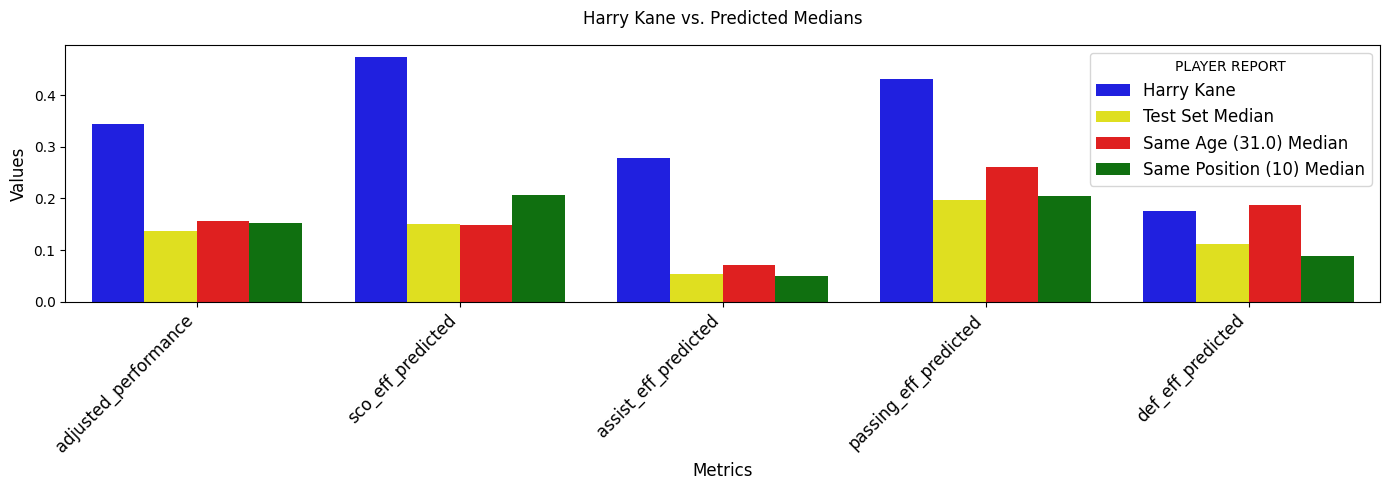

In [10]:
# Visualization
plt.figure(figsize=(14, 5))
attributes = ['adjusted_performance', 'sco_eff_predicted', 'assist_eff_predicted', 'passing_eff_predicted', 'def_eff_predicted']
player_values = [player_data[m] for m in attributes]
test_median_scores = [test_df[m].median() for m in attributes]

player_age = player_data['Age']
player_position = player_data['Pos']
player_idx = test_df[test_df['Player'] == player_name].index[0]

age_medians = test_df[(test_df['Age'] == player_age) & (test_df.index != player_idx)][attributes].median()
position_medians = test_df[(test_df['Pos'] == player_position) & (test_df.index != player_idx)][attributes].median()

data = pd.DataFrame({
    'Metric': attributes * 4,
    'Value': (player_values +
              test_median_scores +
              age_medians.tolist() +
              position_medians.tolist()),
    'Category': ([player_name] * len(attributes) +
                 ['Test Set Median'] * len(attributes) +
                 [f'Same Age ({player_age}) Median'] * len(attributes) +
                 [f'Same Position ({player_position}) Median'] * len(attributes))
})

sns.barplot(x='Metric', y='Value', hue='Category', data=data, palette=['blue', 'yellow', 'red', 'green'])

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.title(f"{player_name} vs. Predicted Medians", pad=15, fontsize=12)
plt.xlabel("Metrics", fontsize=12)
plt.ylabel("Values", fontsize=12)
plt.legend(title="PLAYER REPORT", fontsize=12)
plt.tight_layout()

plt.show()